<a href="https://colab.research.google.com/github/Pager07/AI-Search/blob/master/FruitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fruit Classifier 

## Set up

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload 
%autoreload 2
%matplotlib inline 

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate 

In [0]:
bs  = 64

## Downloading Data

In [0]:
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [0]:
root_dir = '/content/gdrive/My Drive/My Notes/Summer Internships/DeepLearning FastAi/Lesson2/fruit-classifier'
path = Path(root_dir +  '/Data')
classes = [ 'Apple' , 'Banana' ]


In [0]:
for c in classes:
  dest = path/c
  dest.mkdir(parents = True, exist_ok = True)
  
  url_file_name = c + 'Urls.csv' 
  url_file = path/url_file_name
  download_images(url_file , dest , max_pics = 400)


In [0]:
for folder in classes:
  print(folder)
  verify_images(path/folder, delete = True , max_size = 500)

## Viewing Data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train = '.' , valid_pct = 0.2, 
                          ds_tfms = get_transforms() , size = 244,
                          num_workers = 4).normalize(imagenet_stats)

In [33]:
data.classes 

['Apple', 'Banana']

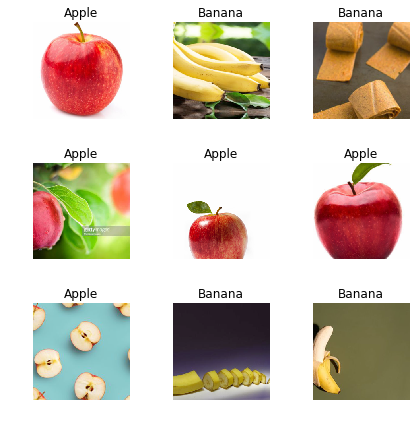

In [35]:
data.show_batch(rows = 3, figsize = (6,6))

In [36]:
data.classes , data.c , len(data.train_ds) , len(data.valid_ds), len(data.train_dl) , len(data.valid_dl)

(['Apple', 'Banana'], 2, 588, 147, 9, 3)

## Training:resnet50

In [37]:
learn = cnn_learner(data ,
           models.resnet50 , metrics = error_rate)
learn.fit_one_cycle(5)
learn.save('stage-1-244-50')


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 107290097.40it/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.409170,0.092761,0.040816,00:31
1,0.218978,0.055920,0.013605,00:18
2,0.160394,0.083561,0.020408,00:18
3,0.114301,0.105208,0.027211,00:18
4,0.101394,0.109204,0.027211,00:18


In [0]:
learn.load('stage-1-244-50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


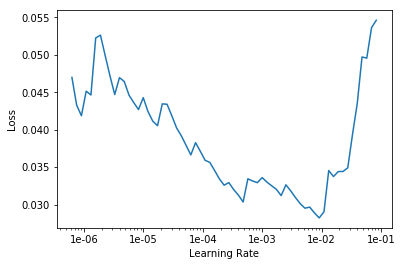

In [39]:
learn.lr_find()
learn.recorder.plot()

In [46]:
learn.unfreeze()
learn.fit_one_cycle(10 , max_lr= slice(1e-05, 1e-02))


epoch,train_loss,valid_loss,error_rate,time
0,0.059325,0.083839,0.034014,00:21
1,0.072616,0.161612,0.047619,00:22
2,0.105892,0.225069,0.068027,00:22
3,0.097432,0.084212,0.020408,00:22
4,0.081204,0.053744,0.006803,00:21
5,0.083705,0.071909,0.006803,00:21
6,0.073856,0.027100,0.013605,00:22
7,0.063052,0.020893,0.006803,00:22
8,0.054132,0.031394,0.006803,00:22
9,0.048283,0.034614,0.020408,00:22


In [47]:
learn.fit_one_cycle(10 , max_lr= slice(1e-05, 1e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.008108,0.031045,0.006803,00:22
1,0.004756,0.024190,0.006803,00:22
2,0.004982,0.021458,0.006803,00:21
3,0.004890,0.006626,0.000000,00:22
4,0.007590,0.050715,0.013605,00:22
5,0.009908,0.051089,0.020408,00:22
6,0.010236,0.071983,0.013605,00:22
7,0.015224,0.041140,0.013605,00:22
8,0.013822,0.034567,0.006803,00:22
9,0.013337,0.033713,0.006803,00:22


In [0]:
learn.save('stage-2-244-50')